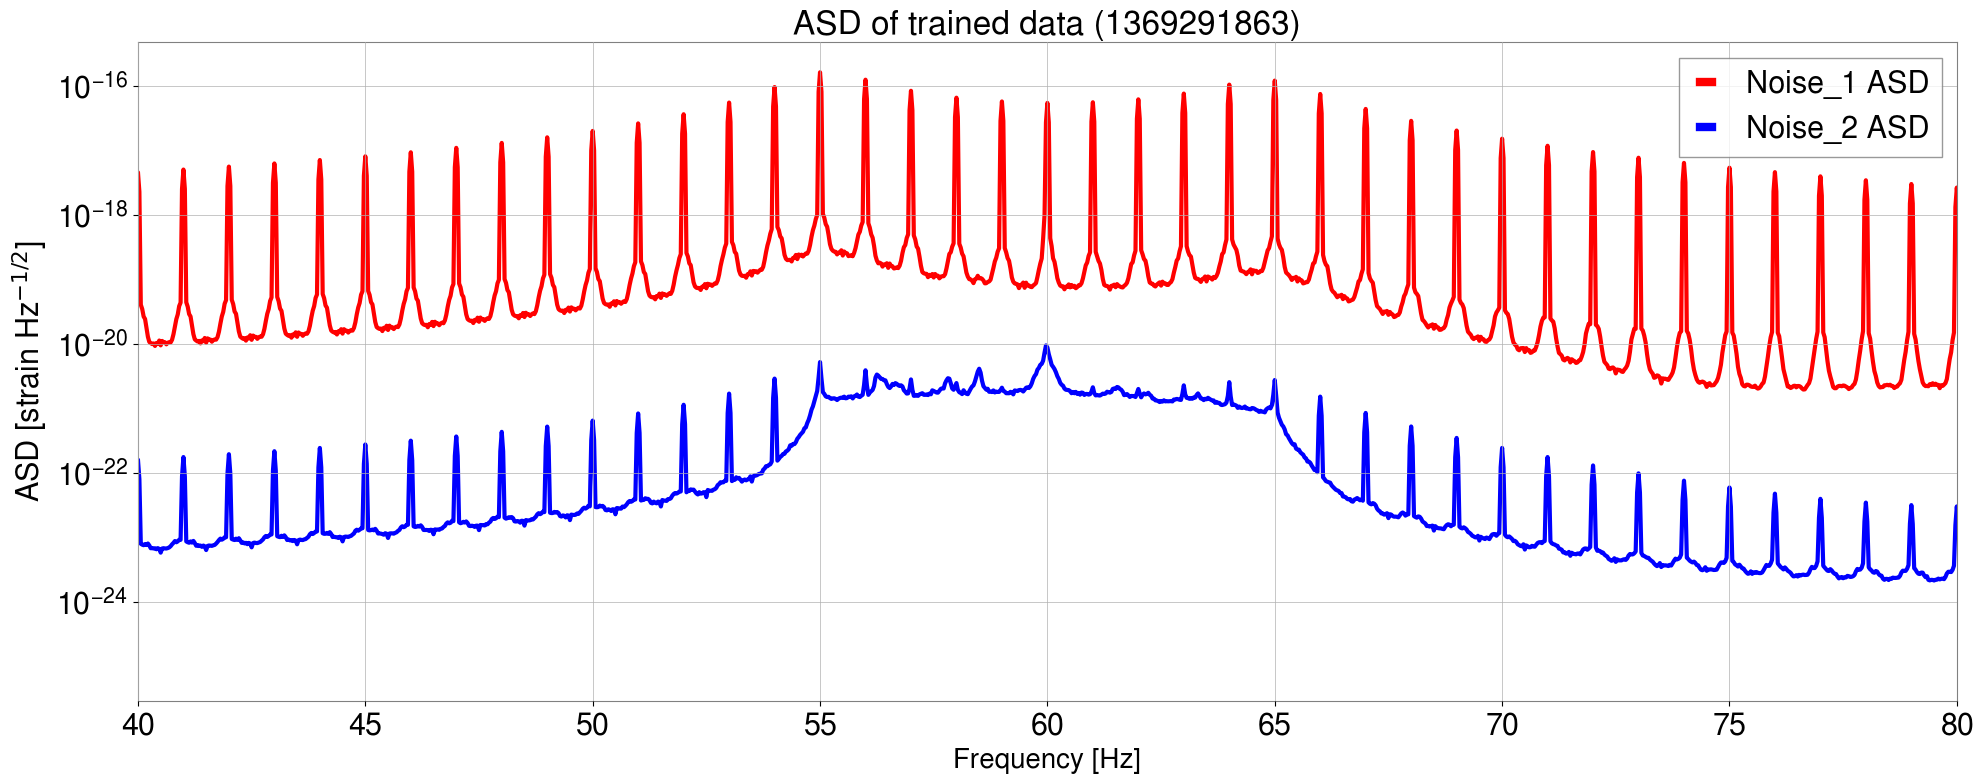

In [1]:
import os
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries

# Define file location and time parameters
ifo = 'K1'

file_loc_1 = f'/home/shuwei.yeh/deepclean/results/{ifo}_results/lightning_logs/version_23/test/'
h5df_data_1 = f'{file_loc_1}/outputs.hdf5'

file_loc_2 = f'/home/shuwei.yeh/deepclean/results/{ifo}_results/lightning_logs/version_33/test/'
h5df_data_2 = f'{file_loc_2}/outputs.hdf5'

start_time, duration = 1369291863, 4096

# fig_loc = f'/home/shuwei.yeh/O4a_stuff/results/trained_data_{version}/strain_and_noise_asd'
# os.makedirs(fig_loc, exist_ok=True)

# Open and read HDF5 file
with h5.File(h5df_data_1, 'r') as file:
    noise_data_1 = file['noise'][0]

# Create TimeSeries objects
noise_ts_1 = TimeSeries(noise_data_1, t0=start_time, sample_rate=4096)
noise_asd_1 = noise_ts_1.asd(fftlength=32, overlap=16, method='median')

with h5.File(h5df_data_2, 'r') as file:
    # Assuming the data is 2D, extracting only the first column
    noise_data_2 = file['noise'][0]

# Create TimeSeries objects
noise_ts_2 = TimeSeries(noise_data_2, t0=start_time, sample_rate=4096)
noise_asd_2 = noise_ts_2.asd(fftlength=32, overlap=16, method='median')

# Plotting ASD
plt.figure(figsize=(20, 8))
plt.title(f'ASD of trained data ({start_time})', fontsize=24)
plt.plot(noise_asd_1, linewidth=3, label='Noise_1 ASD', color='r')
plt.plot(noise_asd_2, linewidth=3, label='Noise_2 ASD', color='b')
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.ylabel(r'ASD [strain Hz$^{-1/2}$]', fontsize=22)
plt.yscale('log')
plt.xlim([40, 80])
# plt.ylim([1e-21, 1e-14])
plt.legend(loc='best', prop={"size": 22})
plt.tick_params(axis='y', labelsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.tight_layout()
# plt.savefig(f'{fig_loc}/{ifo}_{start_time}.png', facecolor = 'white', dpi = 600)
plt.show()